In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization


#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline

from sklearn.metrics import accuracy_score

import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
df =  pd.read_csv("E:/Here/TCS.NS(Anomalies).csv", index_col='Date', parse_dates=True) 
df

C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13-12-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-12-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17-12-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '18-12-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib

,Open,High,Low,Close,Volume
Date,,,,,
2002-09-12,50.750,51.724998,48.025002,48.500000,975768.0
2002-10-12,47.625,50.500000,47.275002,49.612499,837808.0
2002-11-12,51.000,53.987499,50.750000,51.950001,3286400.0
2002-12-12,52.000,54.000000,52.000000,52.375000,2568024.0
2002-12-13,53.000,53.674999,52.275002,52.587502,1112288.0
...,...,...,...,...,...
2023-01-16,3317.000,3353.000000,3298.050049,3334.050049,1843607.0
2023-01-17,3330.000,3381.800049,3321.000000,3378.399902,1688475.0
2023-01-18,3380.000,3408.949951,3372.250000,3390.000000,2421189.0


In [3]:
df.dropna(inplace=True)
df.tail(20)

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-26,3228.350098,3272.000000,3225.050049,3252.899902,870157.0
2022-12-27,3269.199951,3273.800049,3231.500000,3259.500000,835883.0
2022-12-28,3249.800049,3266.100098,3226.000000,3257.100098,910795.0
2022-12-29,3231.100098,3271.500000,3228.000000,3268.750000,1037927.0
2022-12-30,3286.050049,3299.000000,3246.199951,3256.699951,1163131.0
2023-02-01,3261.000000,3266.850098,3235.199951,3261.449951,709547.0
2023-03-01,3252.000000,3320.000000,3245.300049,3311.350098,1245178.0
2023-04-01,3306.699951,3327.350098,3286.199951,3314.649902,1231668.0
2023-05-01,3330.199951,3337.300049,3281.949951,3311.100098,1826057.0


<AxesSubplot:xlabel='Date'>

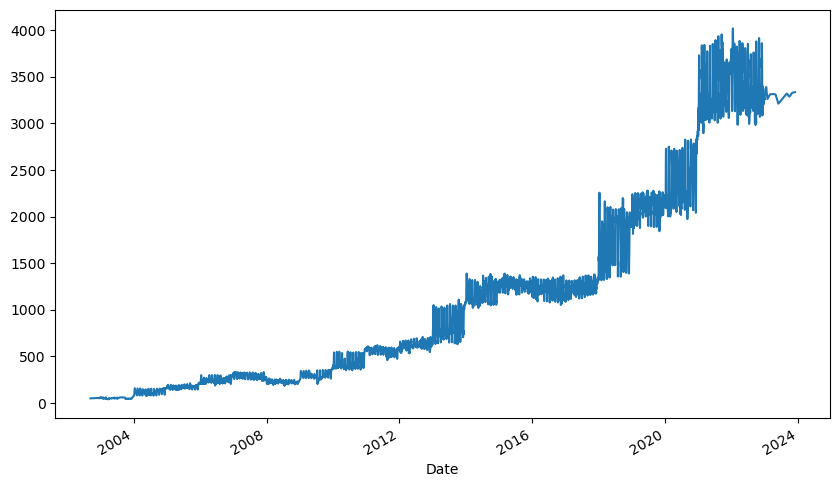

In [4]:
df['Close'].plot()

In [5]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Close'])

In [6]:
def ad_test(dataset):
    datatest = adfuller(dataset, autolag = 'AIC')

    print("1. Test Statistics : ",datatest[0])
    print("2. P-Value : ",datatest[1])
    print("3. No of Lags : ",datatest[2])
    print("4. No of Obseravation used : ",datatest[3])
    print("5. Critical Value : ")
    for key, val in datatest[4].items():
        print("\t",key,":", val)
#P-value should not be less than 0.05 otherwise data will be considered as non stationary and we will need to run tests.

In [7]:
ad_test(df['Close'])
if test_result[1] <= 0.05:
    print("Strong Evidence against the null hypothesis, Data is Non-stationary.")
else:
    print("Weak Evidence against the null hypothesis, Data is Stationary.")

1. Test Statistics :  1.0580100589049615
2. P-Value :  0.9948418318117879
3. No of Lags :  31
4. No of Obseravation used :  4412
5. Critical Value : 
	 1% : -3.4318330255449703
	 5% : -2.8621953177045407
	 10% : -2.56711882970823
Weak Evidence against the null hypothesis, Data is Stationary.


In [8]:
df['Price First Difference'] = df['Close']-df['Close'].shift(1)

In [9]:
df['Close'].shift(1)

Date
2002-09-12            NaN
2002-10-12      48.500000
2002-11-12      49.612499
2002-12-12      51.950001
2002-12-13      52.375000
                 ...     
2023-01-16    3374.550049
2023-01-17    3334.050049
2023-01-18    3378.399902
2023-01-19    3390.000000
2023-01-20    3373.100098
Name: Close, Length: 4444, dtype: float64

In [10]:
df['Seasonal First Difference']=df['Close']-df['Close'].shift(12)

In [11]:
df.head(20)

,Open,High,Low,Close,Volume,Price First Difference,Seasonal First Difference
Date,,,,,,,
2002-09-12,50.750000,51.724998,48.025002,48.500000,975768.0,NaN,NaN
2002-10-12,47.625000,50.500000,47.275002,49.612499,837808.0,1.112499,NaN
2002-11-12,51.000000,53.987499,50.750000,51.950001,3286400.0,2.337502,NaN
2002-12-12,52.000000,54.000000,52.000000,52.375000,2568024.0,0.424999,NaN
2002-12-13,53.000000,53.674999,52.275002,52.587502,1112288.0,0.212502,NaN
2002-12-16,53.250000,53.674999,50.025002,50.325001,1231456.0,-2.262501,NaN
2002-12-17,51.275002,51.275002,48.900002,49.400002,855656.0,-0.924999,NaN
2002-12-18,49.950001,50.724998,48.599998,48.937500,618096.0,-0.462502,NaN
2002-12-19,49.924999,54.375000,49.375000,53.075001,3770256.0,4.137501,NaN


In [12]:
ad_test(df['Seasonal First Difference'].dropna())

1. Test Statistics :  -12.558205855832414
2. P-Value :  2.1311037313646174e-23
3. No of Lags :  31
4. No of Obseravation used :  4400
5. Critical Value : 
	 1% : -3.431837072523396
	 5% : -2.862197105532025
	 10% : -2.5671197814566113


<AxesSubplot:xlabel='Date'>

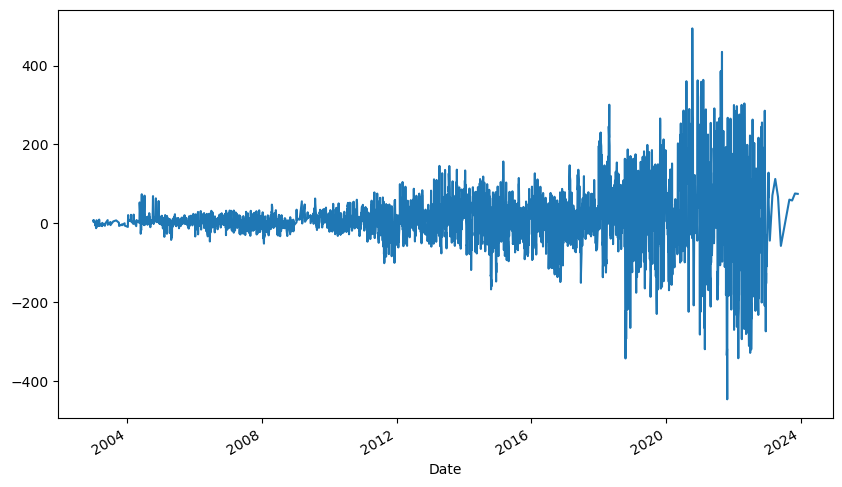

In [13]:
df['Seasonal First Difference'].plot()

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
print(df.shape)
train=df.iloc[:-50]
test=df.iloc[-50:]
print(train.shape, test.shape)

(4444, 7)
(4394, 7) (50, 7)


In [16]:
model=ARIMA(train['Close'], order=(1,0,1), seasonal_order=(0,1,0,12))
model=model.fit()
model.summary()

C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                 4394
Model:             ARIMA(1, 0, 1)x(0, 1, [], 12)   Log Likelihood              -21314.584
Date:                           Tue, 24 Jan 2023   AIC                          42635.168
Time:                                   16:45:14   BIC                          42654.324
Sample:                                        0   HQIC                         42641.927
                                          - 4394                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9010      0.004    235.174      0.000       0.894       0.909
ma.L1          0.0599      0.010      6.289      0.000       0.041       0.079
sigma2       983.1481      9.168    107.243      0.000     965.180    1001.116
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             13906.75
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              45.85   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2022-11-14    3306.577508
2022-11-15    3287.579531
2022-11-16    3280.546786
2022-11-17    3298.838758
2022-11-18    3354.929621
2022-11-21    3327.505497
2022-11-22    3284.064053
2022-11-23    3287.062798
2022-11-24    3296.468864
2022-11-25    3272.607222
2022-11-28    3256.610061
2022-11-29    3361.866988
2022-11-30    3347.950501
2022-01-12    3324.858168
2022-02-12    3314.136252
2022-05-12    3329.104141
2022-06-12    3382.199880
2022-07-12    3352.077036
2022-08-12    3306.203942
2022-09-12    3307.011678
2022-12-12    3314.443562
2022-12-13    3288.803106
2022-12-14    3271.203168
2022-12-15    3375.015931
2022-12-16    3359.798198
2022-12-19    3335.533392
2022-12-20    3323.755035
2022-12-21    3337.771029
2022-12-22    3390.009075
2022-12-23    3359.113417
2022-12-26    3312.543988
2022-12-27    3312.724300
2022-12-28    3319.590851
2022-12-29    3293.441009
2022-12-30    3275.382094
2023-02-01    3378.781303
2023-03-01    3363.190940
2023-04-01    3338.590382
2023-05

C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)

74.02254459809251


In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
model2=ARIMA(df['Close'],order=(1,0,1),seasonal_order=(0,1,0,12))
model2=model2.fit()
df.tail(5)

C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-

,Open,High,Low,Close,Volume,Price First Difference,Seasonal First Difference
Date,,,,,,,
2023-01-16,3317.0,3353.000000,3298.050049,3334.050049,1843607.0,-40.500000,65.300049
2023-01-17,3330.0,3381.800049,3321.000000,3378.399902,1688475.0,44.349853,121.699951
2023-01-18,3380.0,3408.949951,3372.250000,3390.000000,2421189.0,11.600098,128.550049
2023-01-19,3380.0,3387.000000,3361.000000,3373.100098,1585044.0,-16.899902,61.750000
2023-01-20,3365.0,3394.649902,3355.600098,3363.100098,1529349.0,-10.000000,48.450196


<AxesSubplot:xlabel='Date'>

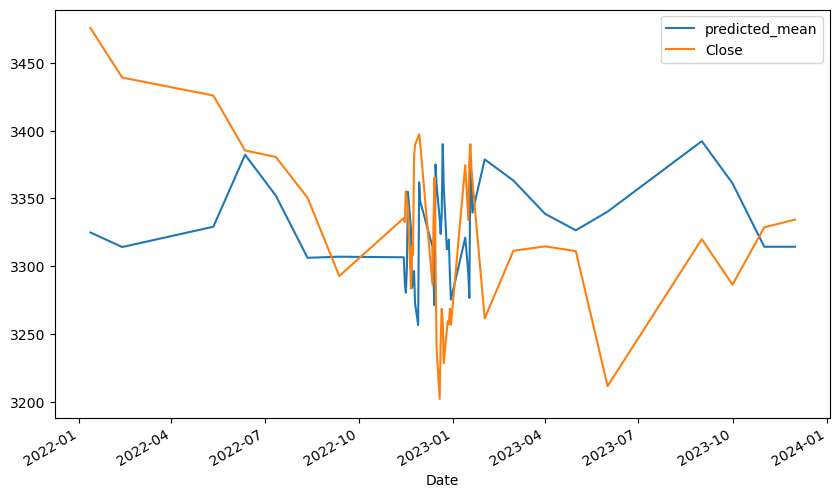

In [21]:
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [22]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [23]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [24]:
pred=model2.predict(start=len(df),end=len(df)+30,type='levels').rename('ARIMA Predictions')
print(pred)

4444    3354.451744
4445    3250.544204
4446    3355.024608
4447    3317.949029
4448    3357.077917
4449    3359.875652
4450    3397.509902
4451    3354.702092
4452    3396.976104
4453    3406.709015
4454    3388.129606
4455    3376.618915
4456    3366.611717
4457    3261.481917
4458    3364.862916
4459    3326.798440
4460    3365.037829
4461    3367.035473
4462    3403.950053
4463    3360.494911
4464    3402.186659
4465    3411.395830
4466    3392.345326
4467    3380.410892
4468    3370.022543
4469    3264.549904
4470    3367.622524
4471    3329.280666
4472    3367.270554
4473    3369.043776
4474    3405.756492
Name: ARIMA Predictions, dtype: float64


C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
